In [1]:
from brian2 import *
import numpy
import numpy
%matplotlib inline

In [7]:
import math

# This cell generates gamma values using the Weierstrass definition of the gamma function
# Variable em is the Euler-Mascheroni constant
# NOTE: Set B to generate desired gamma values.
# NOTE: Generated gamma values must be directly added to the equations


B = 0.2
em = 0.577216

gamma_double_param = list()

for k in range(100):
    z = B*k + B
    gamma = z * math.e**(em*z)
    
    for n in range(1, 51):
        gamma = gamma * (1+z/n) * math.e**(-1 * z / n)
        
    gamma_double_param.append(gamma)

gamma_single_param = list()

for k in range(100):
    z = B*k + 1
    
    gamma = z * math.e**(em*z)
    
    for n in range(1, 51):
        gamma = gamma *(1+z/n) * math.e**(-1 * z / n)
    
    gamma = gamma**-1
        
    gamma_single_param.append(gamma)

#print(gamma_double_param)
#print(gamma_single_param)

value = 0
for i in range(100):
    value += ((-1 * 0.00172**B)/0.2)**i / gamma_single_param[i]
    
print(value)

0.3860635868835724


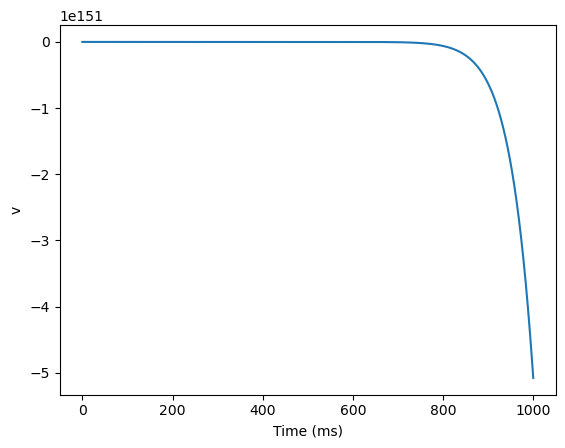

In [9]:
start_scope()


g = 25 * 10**-9
cap = 0.5 * 10**-9
# Tau = Capacitance / conductance
tau = cap / g
B = 0.2
nul = 1*second
a = 2.5 * 10**-9
vl = -70 * 10^-3
vi = 0

# Modify units for gamma function computations 
    
# two current functions I, J, where J = dI/dt
# Customize I; set J to be its derivative w.r.t. t

# two Mittag-Lefflers, E and F; E is the single-parameter version, F is the double-parameter version
# B is our beta value

# Using precomputed gamma approximations



"""
eqs = '''
dv/dt = (J/g + (vi - vl - I/g) * F * -1/tau * nt**(B-1) - (E * J/g)) / nul : 1
I = a*nt : 1
J = a : 1
nt = t / nul : 1
'''
"""

eqs = '''
dv/dt = ((vl + (vi - vl)*E)*F*(nt)**(B-1) / tau - E*(vi-vl)*(F)*(nt)**(B-1) / tau)/E**2 / nul : 1
nt = t / nul : 1
'''

eqs += "B = " + str(B) + " : 1\n"

single_param = "E = "
double_param = "F = "
for i in range(100):
    single_param += "(-1 * nt**B /tau)**" + str(i) + "/" + str(gamma_single_param[i])
    double_param += "(-1 * nt**B /tau)**" + str(i) + "/" + str(gamma_double_param[i])
    if i < 99:
        single_param += " + "
        double_param += " + "
    else:
        single_param += " : 1 \n"
        double_param += " : 1"

eqs += single_param + double_param

temp = '''
v = E : 1
nt = t / nul : 1
'''
temp += single_param

G = NeuronGroup(1, temp, method='euler')
M = StateMonitor(G, 'v', record=True)

run(1000*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [ ]:
#start_scope()

# parameter for noise
sigma = 0.0

# parameters for network size
inputDim = 10
numHidden = 3
hiddenDim = 10
outputDim = 10

# diff-equation for neurons
eqs = '''
dv/dt = (I-v)/tau + sigma*xi*tau**-0.5 : 1 (unless refractory)
I : 1
tau : second
'''




# setup for neurons
InputLayer = NeuronGroup(inputDim, eqs, threshold='v>=1', reset='v = 0', refractory=5*ms, method='euler')
inputCurrent = list()
inputTau = list()
for i in range(inputDim):
    inputCurrent.append(.05)
    inputTau.append(10)
InputLayer.I = inputCurrent
InputLayer.tau = inputTau*ms

HiddenLayers = list()
for i in range(numHidden):
    HiddenLayers.append(NeuronGroup(hiddenDim, eqs, threshold='v>=1', reset='v = 0', refractory=5*ms, method='euler'))
    hiddenCurrent = list()
    hiddenTau = list()
    for j in range(hiddenDim):
        hiddenCurrent.append(.05)
        hiddenTau.append(10)
    
    HiddenLayers[i].I = hiddenCurrent
    HiddenLayers[i].tau = hiddenTau*ms

OutputLayer = NeuronGroup(outputDim, eqs, threshold='v>=1', reset='v = 0', refractory=5*ms, method='euler')
outputCurrent = list()
outputTau = list()
for i in range(outputDim):
    outputCurrent.append(.05)
    outputTau.append(10)
OutputLayer.I = outputCurrent
OutputLayer.tau = outputTau*ms

#Set synapses between each layer; each neuron gets its feedforward trace and spikes from the previous layer
# input layer connects to all nodes of first hidden layer
# hidden layers are connected to all of each other
# final hidden layer connects to all of output layer
InputSynapses = Synapses(InputLayer, HiddenLayers[0], 'w : 1', on_pre = 'v_post += w')
InputSynapses.connect()
InputSynapses.w = 0.05

HiddenSynapses = list()
for i in range(numHidden - 1): 
    HiddenSynapses.append(Synapses(HiddenLayers[i], HiddenLayers[i+1], 'w : 1', on_pre = 'v_post += w'))
    HiddenSynapses[i].connect()
    HiddenSynapses[i].w = 0.05

OutputSynapses = Synapses(HiddenLayers[numHidden - 1], OutputLayer, 'w : 1', on_pre = 'v_post += w')
OutputSynapses.connect()
OutputSynapses.w = 0.05





run(200*ms)